<a href="https://colab.research.google.com/github/janchorowski/nn_assignments/blob/nn18/assignment3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment: basic of Neural Net

**Submission deadline: last lab session before or on --,--,-- --:--**

**Points: 12 + 7 bonus points**


In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
To: /content/mnist.npz
55.4MB [00:00, 108MB/s]


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import httpimport
import seaborn as sns

sns.set_style('whitegrid')

# Problem 1: Gradient Descent [2p + 2b]

The Gradient Descent (GD) algorithm finds the minimum of a given
function by taking small steps along the function's gradient. In
pseudocode:

>$\Theta \leftarrow \Theta_0$

>**while** stop condition not met **do**

>$~~~~$$\Theta \leftarrow \Theta - \alpha \nabla_\Theta f(\Theta)$

>**end while**

where $f$ is the function to minimize, $\nabla_\Theta f(\Theta)$
denotes $f$'s gradient at $\Theta$ and $\alpha$ is the step size,
taking typically values from $10^{-4},\ldots,10^{-1}$.


1. **[1p]** Implement the GD algorithm as a function:

  \begin{equation}
      \Theta_{opt} = \text{GD}(f, \Theta_0, \alpha, \rho),
  \end{equation}

  where $f$ is a function returning the cost and the gradient of the
  cost with respect to parameter vector
  $\Theta$, $\Theta_0$ is the initial value, and $\alpha$
  is the step size (a.k.a. the learning rate).
  You can assume that $\alpha$
  remains constant throughout the optimization.
  Terminate when the function values will differ by less than $\rho$
  between subsequent iterations, eg. by $10^{-10}$.

2. **[1p]** Use the GD algorithm to find the optimum of the
  Rosenbrock (https://en.wikipedia.org/wiki/Rosenbrock_function) function.
  Set $(0,2)$ as the initial point. Try to set an appropriate learning rate
  $\alpha$.

  Plot the values found by GD at subsequent iterations. Set log scale for
  the Y axis.

  Plot function contours and values of $\Theta$ at subsequent
  iterations.
  
  **Note**: You can debug your implementation by using the
  gradient checking routines.
  
  Numerical optimization is of great importance,
  and many algorithms beside GD exists. Get familiar with the L-BFGS
  algorithm
  (for Python: `scipy.optimize.fmin_l_bfgs_b`). Use the
  L-BFGS algorithm to find the optimum of the Rosenbrock function
  and plot the contours and $\Theta$'s in subsequent iterations.

  How many iterations do BGD and L-BFGS need to find a point, for
  which the Rosenbrock function value is lower than $10^{-10}$?
  
3. **[2p bonus]** Implement Newton's method (https://en.wikipedia.org/wiki/Newton's_method_in_optimization) and compare it with the previous methods. You will also need to implement a line search alogithm, e.g. (https://en.wikipedia.org/wiki/Backtracking_line_search) and make sure that the Newton's direction is indeed one along which the function is minimized (the Newton method is only guaranteed to work on convex functions, and behaves badly near critical points of non-convex functions).

In [ ]:
#
# Implement the Rosenbrock function
# 


def check_gradient(f, X, delta=1e-4, prec=1e-6):
    fval, fgrad = f(X)
    num_grad = numerical_gradient(f, X, delta=delta)
    diffnorm = np.sqrt(np.sum((fgrad-num_grad)**2))
    gradnorm = np.sqrt(np.sum(fgrad**2))
    if gradnorm>0:
        if not (diffnorm < prec or diffnorm/gradnorm < prec):
            raise Exception("Numerical and anaylical gradients differ: %s != %s!" %
                            (num_grad, fgrad))
    else:
        if not (diffnorm < prec):
            raise Exception("Numerical and anaylical gradients differ: %s != %s!" %
                            (num_grad, fgrad))
    return True

##     
def rosenbrock_v(x):
    """Returns the value of Rosenbrock's function at x"""
    return TOOD
##
def rosenbrock(x):
    """Returns the value of rosenbrock's function and its gradient at x
    """
    val = TODO
    dVdX= TODO
    return [val, dVdX]

#
# Feel free to add your own test points.
#
for test_point in [[0., 0.],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(rosenbrock, np.array(test_point), prec=1e-5)

In [ ]:
#
# Fill in the details of the gradient descent
#

def GD(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000): # max_steps == epochs
    """Runs gradient descent algorithm on f.
    
    The baisic iteration is:
    val, dVdTheta <- f(Theta)
    Theta <- -alpha * dVdTheta
    
    Args:
        f: function that when evalueted on a Theta of same dtype and shape as Theta0
            returns a tuple (value, dVdTheta) with dValuedTheta of the same shape
            as Theta
        Theta0: starting point
        alpha: step length
        stop_tolerance: stop iterations when improvement is below this threhsold
        max_steps: maximum number of steps
        
    Returns:
        tuple:
        - ThetaOpt
        - history: list of length num_steps containing tuples (Theta, (val, dValdTheta))
    
    """
    history = []
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step < max_steps:
        previous_value = value
        value, gradient = f(Theta)
        history.append([Theta, (value, gradient)])
        
        if TODO < stop_tolerance:
            break
        
        Theta = TODO
        
        history.append([Theta, f(Theta)])
        step += 1
    
    history.append([Theta, f(Theta)])
    return Theta, history

In [ ]:
#
# Find the optimum
#

X0 = [0.,2.]
Xopt, Xhist = GD(rosenbrock, X0, alpha=1e-3, stop_tolerance=1e-10, max_steps=1e6)

print "Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist))

#
# Plot how the value changes over iterations
#

TODO

#
# Make a contour plot of the Rosenbrock function and show the trajectory
# used by gradient descent.
#
# you may want to use functions: meshgrid, contour
#

TODO

In [ ]:
#
# Use scipy.optimize.fmin_l_bfgs_b
# Again plot the path on the coutnour plot
#
# Hint: to save the points you can use the callback argument!
#

import scipy.optimize as sopt
lbfsg_hist = []
def save_hist(x):
    lbfsg_hist.append(np.array(x))

x_start = [0.,2.]
lbfsgb_ret = sopt.fmin_l_bfgs_b(TODO, callback=save_hist)

#
# TODO: make a conour plot, show points considered by l_bfsgb algorithm and by gradient descent.
# How many steps did l-bfgs take to optimize the Rosenbrock function?
#

In [ ]:
#
# Bonus problem
#

# Newtod-Raphson Method

def rosenbrock_hessian(x):
    
    # TODO: compute the value, gradient and Hessian of Rosenbrock's function'
    
    return [val, np.array((dvdx0, dvdx1)), H]


def Newton(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    
    # TODO:
    #  - implement the newton method and a simple line search
    #  - make sure your function is resilient at critical points (such as seddle points)
    #  - if the Newton direction is not minimizing the function, use the gradient for a few steps
    #  - try to beat L-BFGS on the bmber of function evaluations needed!
    
    raise NotImplementedError

# Problem 2: Logistic Regression [1p]

Linear regression is suitable for problems, where
the forecasted values are real numbers. We use logistic regression,
when we want to label the data with $0$ and $1$.

Let $x\in \mathbb{R}^n$ be a vector of $n$ real numbers, and
$y\in \{0,1\}$ the given class label. Similarly to what was shown
during the lecture, we add an additional element $x_0=1$
to vector $x$, to account for the bias term (and simplify the equations).

Similarly to linear regression, vector
$\Theta\in \mathbb{R}^{n+1}$ parametrizes the model
($n$ coefficients describes the data, the remaining one is the intercept).
In logistic regression, we model conditional probability that
sample $x$ belongs to class $1$ as:

\begin{equation}
p(\text{class}=1|x, \Theta)=h_\Theta(x) = \sigma\left(\sum_{j=0}^n \Theta_j x_j\right) 
= \sigma\left(\Theta^T x \right),
\end{equation}

where $\sigma(a) = \frac{1}{1+\exp(-a)}$ is being called the logistic sigmoid
(a function, which plot is s-curved).

An unknown sample $x$ is being labeled $1$ if
$h_\Theta(x)\geq 0.5$, or equivalently, $\Theta^T x \geq 0$.

Classification mismatch between the forecasted values and
the data is being measured most of the time with cross-entropy:

\begin{equation}
    J(\Theta) = - \sum_{i=1}^m y^{(i)} \log \left(h_\Theta (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_\Theta (x^{(i)})\right),
\end{equation}

assuming $0\log(0)=0$.

Use logistic regression to distinguish
  _Versicolor_ and _Virginica_ irises. Use only the
  `petal length` and `petal width` features. Use either
  Gradient Descent, or L-BFGS to solve for the optimal $\Theta$.
  Prepare the scatterplot of the data and plot the class separation
  boundary found by logistic regression.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
print 'Features: ', iris.feature_names
print 'Targets: ', iris.target_names
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


Text(0,0.5,'petal_width')

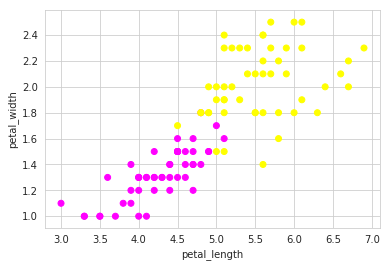

In [5]:
#Extract the petal_length and petal_width of versicolors and virginicas

IrisX = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[:, iris.target!=0]

# Set versicolor=0 and virginica=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [ ]:
#
# Our Gradient Descent implementation and lBFSG-B take as argumet a function, or more generally
# a callable - i.e. something that you can call. Implement below a callable for logistic regression.
#

class LogisticRegressionCost(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    #note: this creates a Pyton callable - i.e. an object that can be called as a function
    def __call__(self, Theta):
        X = self.X
        Y = self.Y
        
        #reshape Theta
        ThetaR = Theta.reshape(X.shape[0],1)
        
        nll = TODO
        
        grad = TODO
        
        #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
        return nll, grad.reshape(Theta.shape)

iris_log_reg_cost = LogisticRegressionCost(IrisX, IrisY)

#TODO: add a few gradient checks as in the code above!

Theta0 = np.zeros((3))

#
# Call a solver. You can use lBFSG-B or gradient descent. 
# Logistic regression cost is convex and lBFSG-B will work wery well on it.
# However, neural network costs are not convex and we will use GD variants
# more often with them.
#

ThetaOpt = TODO

#
# Now plot the found separation line 
# 

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')
pl_min, pl_max = xlim()
pl = linspace(pl_min, pl_max, 1000)
plot(pl, -(ThetaOpt[0]+ThetaOpt[1]*pl)/ThetaOpt[2])
xlim(pl_min, pl_max)

# Problem 3: Backpropagation through a *tanh* Neuron [2p]


In the following assignments let:
 * $X \in \mathbb{R}^{k\times N}$ be the data matrix containing $N$
  samples each described with $k$ features. The $i$-th sample $x^{(i)} \in
  \mathbb{R}^{(k\times 1)}$ is the $i$-th column of $X$.
 * $Y \in \mathbb{R}^{1\times N}$ be the row-vector of targets,
  with $y^{(i)}$ being the target for the $i$-th sample.
 * $\Theta\in\mathbb{R}^{k\times 1}$ be the vector of parameters.


  We want to use a single neuron with the $\tanh(x) = \frac{e^x -
    e^{-x}}{e^x + e^{-x}}$ activation function.
  First find the derivative $\frac{\partial \tanh(x)}{\partial
    x}$ and express it as a function of $\tanh(x)$.
  Forward computations performed by the neuron are:
  
  \begin{align*}
    A &= \Theta^T X \\
    \hat{Y} &= \tanh(A) \text{ applied elementwise} \\
    E &= Y - \hat{Y} \\
    J &= E \cdot E^T
  \end{align*}

**[2p]**  Find and express using matrix notation the following gradients. You
  can refer to values and gradients computed earlier in the expressions for the
  following ones -- just as you would when implementing a computer
  program. Use $\odot$ for the elementwise multiplication of matrices.

  \begin{align*}
    \frac{\partial J}{\partial E } &= ? \\
    \frac{\partial J}{\partial \hat{Y}} &= ? \\
    \frac{\partial J}{\partial A} &= ? \\
    \frac{\partial J}{\partial \Theta} &= ? \\
  \end{align*}
  
  **Note:** each gradient above should be implementable as a
  compact expression in Python+NumPy.

  **Hint:** write down the shapes of all values that you
  compute. Work out the expressions for a single element of the
  gradient, then see how they can be expressed using the matrix
  notation.

# Problem 4: SoftMax Regression [2p]

The samples in the Iris dataset belong to one of three classes, while in
CIFAR10 and MNIST they belong to one of 10 classes. Thus, linear regression cannot be
applied because it distinguishes between two classes only.
We will use SoftMax regression instead.

Let $x\in \mathbb{R}^n$ be a sample vector and
$y\in \{1,2,\ldots,K\}$ its class label.
Similarly to what has been done during the lecture,
we extend vector $x$ with the bias term $x_0=1$ to simplify the calculations
(so now $x\in \mathbb{R}^{n+1}$).

In SoftMax regression, we model conditional probability, that 
a given sample $x$ belongs to class $k$. Such model is parametrized
with a matrix $\Theta\in\mathbb{R}^{K \times n+1}$.
Note that in SoftMax regression, a separate linear model is build for each
class. First we compute the vector $a$ of total inputs:
\begin{equation}
a_k = \sum_{j=0}^{n}\Theta_{k,j}x_j,
\end{equation}
or using matrix notation $a = \Theta x$.
Then we compute conditional probabilities using SoftMax regression:
\begin{equation}
p(\text{class}=k|x, \Theta)= o_k = \frac{\exp{a_k}}{\sum_{j=1}^K \exp{a_j}}.
\end{equation}

Function SoftMax transforms a $K$-element vector of real numbers
to a vector of non-negative numbers which sum to 1. Thus they can be
treated as probabilities assigned to $K$ separate classes.

As it is the case with linear regression, we use cross-entropy
as the loss function in SoftMax regression:
\begin{equation}
\begin{split}
J^{(i)}(\Theta) &= - \sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)} \\
J(\Theta) &= \frac{1}{m}\sum_{i=1}^m J^{(i)}(\Theta)= -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)} 
\end{split}
\end{equation}

where $[y^{(i)}=k]$ equals $1$ when the $i-$th sample belongs to class $k$,
and $0$ otherwise.
Value $[y^{(i)}=k]$ might be interpreted as the correct value of the $k$-th
output of the model on sample $i$.
In addition, the total loss is expressed as a mean loss of particular samples,
to make it independent of the size of the training set.

Loss function gradient with respect to total inputs $a$ is simple:
\begin{equation}
    \frac{\partial J^{(i)}}{\partial a^{(i)}_k} = o_k^{(i)} - [y^{(i)}=k].
\end{equation}

Using the chain rule, the gradient of the loss function with respect to
model parameters becomes:
\begin{equation}
    \frac{\partial J}{\partial \Theta_{kj}} = \sum_{i=1}^m \frac{\partial J}{\partial J^{(i)}}\frac{\partial J^{(i)}}{\partial \Theta_{kj}} = \sum_{i=1}^m \frac{1}{m}\cdot \frac{\partial J^{(i)}}{\partial a^{(i)}_k} \frac{\partial a^{(i)}_k}{\partial \Theta_{kj}} = \frac{1}{m}\sum_{i=1}^m \frac{\partial J^{(i)}}{\partial a^{(i)}_k} x^{(i)}_j.
\end{equation}

___

1. **[2p]**
  Implement SoftMax regression and apply it to the Iris dataset.
  During training, use L-BFGS from `scipy.optimize`. You can initialize the algorithm
  with a null matrix (all entries being zeros).
  Obtained accuracy should be comparable with that of k-NN
  (roughly 3% of errors).
  If your model doesn't work, check the gradient using the `check_gradient`
  routine from the Starter Code of Assignment 3, which computes the gradient numerically.

In [ ]:
#
# Here we load the IRIS dataset.
# We will create two datasets:
#  - one using all features,
#  - one using just Petal Langth and Petal Width for visualizations.
#
from sklearn import datasets
iris = datasets.load_iris()
petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

IrisXFull = np.vstack([np.ones_like(petal_length), iris.data.T])
IrisX2feats = np.vstack(
    [np.ones_like(petal_length), petal_length, petal_width])
IrisY = iris.target.reshape(1, -1).astype(np.int64)

print "IrisXFull is a %s-shaped matrix of %s" % (IrisXFull.shape, IrisXFull.dtype)
print "IrisX2feats is a %s-shaped matrix of %s" % (IrisX2feats.shape, IrisX2feats.dtype)
print "IrisY is a %s-shaped matrix of %s" % (IrisY.shape, IrisY.dtype)

scatter(IrisX2feats[1, :], IrisX2feats[2, :], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [ ]:
def SoftMaxRegression_implementation(ThetaFlat, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient

    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters containing (n_features*n_classes) entries
    X :
        array of features, shape n_features x n_smaples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the los and gradient is computed on the X,Y pairs
    """
    # X is num_features x num_samples
    num_features, num_samples = X.shape

    # Theta is num_features x num_classes
    # we first reshape ThetaFlat into Theta
    Theta = ThetaFlat.reshape(num_features, -1)

    # Activation of softmax neurons
    # A's shape should be num_classes x num_samples
    #
    # TODO
    # A =
    #

    # Now compute the SoftMax function
    # O will be a num_classes x num_samples matrix of probabilities assigned by our model
    # Stability optimization - for each subtract the maximum activation
    O = A - A.max(0, keepdims=True)
    #
    # TODO - compute SoftMax as vector O. Take the exp and normalize, so all values of O
    #        would sum to 1.0.
    #

    if return_probabilities:
        return O

    # The loss is the average per-sample nll (neg log likelihood)
    # The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0 / num_samples * np.sum(correct_class_likelihoods)

    # For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    # Please fill in its computation
    # Don't forget to normalize the gradient by num_samples.
    #
    # TODO
    # dLdA =
    #

    # Now we compute the gradient of the loss with respect to Theta
    dLdTheta = np.dot(X, dLdA.T)

    # reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdTheta.reshape(ThetaFlat.shape)


# Make a function for training on irises
def iris_log_reg_cost(Theta): 
  
  return SoftMaxRegression_implementation( Theta, IrisXFull, IrisY, False)


# Make sure that the gradient computation is OK
check_gradient(iris_log_reg_cost, np.zeros((3 * 5,)))
check_gradient(iris_log_reg_cost, np.random.rand(3 * 5) * 2.0 - 1.0)

In [ ]:
#
# Call the solver
#

# NOTE: iprint will cause the solver to print TO THE TERMINAL
#       from which ipython notebook was started
ThetaOpt = sopt.fmin_l_bfgs_b(
    iris_log_reg_cost, np.zeros((3 * 5,)), iprint=1)[0]

check_gradient(iris_log_reg_cost, ThetaOpt)

In [ ]:
#
# Compute training errors
#

probabilities = SoftMaxRegression_implementation(
    ThetaOpt, IrisXFull, return_probabilities=True)
predictions = np.argmax(probabilities, 0)

print "Training accurracy: %f%%" % ((predictions == IrisY.ravel()).mean() * 100)

In [ ]:
#
# Now redo the training for two features
#
# TODO: again, use l_bfgs to find optimal theta, 
#       then compute probabilities and new predictions.
#

print "Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100)

In [ ]:
#
# Now plot the decision boundary
#

petal_lengths, petal_widths = np.meshgrid(
    np.linspace(IrisX2feats[1, :].min(), IrisX2feats[1, :].max(), 100),
    np.linspace(IrisX2feats[2, :].min(), IrisX2feats[2, :].max(), 100))

IrisXGrid = np.vstack([np.ones(np.prod(petal_lengths.shape)),
                       petal_lengths.ravel(), petal_widths.ravel()])
predictions_Grid = SoftMaxRegression_implementation(
    Theta2class, IrisXGrid, return_probabilities=True).argmax(0)

In [ ]:
contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
scatter(IrisX2feats[1,:], IrisX2feats[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')
title('Decision boundary found by SoftMAx regression')

# Problem 5: 2-layer Neural Network [2p]

The task is to extend the SoftMax regression model to a 2-layer neural net.
The network will transform an input vector to an activation vector
of hidden neurons and finally, using the SoftMax function,
to a vector of probabilities of the sample's belonging to one of 10 classes.

To train the network, we'll need the loss function $J$ and its gradient
with respect to network's parameters (weights and biases).
For a 2-layer net, this can be achieved using the following relationships:

### Data

The training set has $m$ samples of $n$ dimensions, belonging to one
of $K$ classes, it is given as a set of matrices: $X \in \mathbb{R}^{n\times m}$
and $Y\in \{1,2,\ldots,K\}^{1\times m}$.

### Parameters

The net will have 2 layers: 1) a hidden one, having $L$ neurons,
and 2) an output one, having $K$ neurons (one for each of $K$ classes).
The layers are defined through:


1. the parameters of the hidden layer, which maps $n$-dimensional input vectors
  into activations of $L$ neurons:
  weight matrix $W^h\in\mathbb{R}^{L\times n}$ and bias vector
  $b^h\in\mathbb{R}^{L\times 1}$,
  
2. the parameters of the output layer, which maps $L$-dimensional vector
  of activations of the hidden layer to $K$ activations of output neurons:
  weight matrix $W^o\in{K\times L}$ and bias vector $b^o\in\mathbb{R}^{K\times 1}$.

### Signal forward propagation (fprop)

Each hidden neuron computes its total input as a sum of product of its
inputs, weight matrix and bias. For an $i$-th sample,
the total input
${a^{h}}^{(i)}_l $ of an $I$-th neuron is thus:
\begin{equation}
{a^h}^{(i)}_l = \sum_{j=1}^n {W^h}_{l,j}x^{(i)}_j + {b^h}_l
\end{equation}
The total input of neurons might also be expressed via matrices,
using matrix multiplication and broadcasting (which allows to add
a column vector to all column vectors of a matrix):
\begin{equation}
{a^h} = W^h\cdot x + b^h
\end{equation}
This can be implemented in Python as `ah = W.dot(x) + b`.

Next, we compute activation $h^h$ of hidden neurons with hyperbolic tangent
$\tanh(a) = \frac{e^a-e^{-a}}{e^a+e^{-a}}$:
\begin{equation}
{h^h}^{(i)}_l=\tanh({a^h}^{(i)}_l)
\end{equation}
Thanks to vectorization in Python + numpy, $h^h$ might be computed with a single
expression `hh = numpy.tanh(ah)`.

Total input of the output layer can be computed using
activations of the hidden layer (with the help of broadcasting) as:

\begin{equation}
a^o = W^o\cdot h^h + b^o
\end{equation}

Finally, probabilities of a sample's belonging to  particular classes
have to be computed. This can be achieved with SoftMax:

\begin{equation}
    p(y^{(i)}=k|x^{(i)}) = o^{(i)}_k = \frac{\exp({a^o}^{(i)}_k)}{ \sum_{k'=1}^K \exp( {a^o}^{(i)}_{k'} )}.
\end{equation}

Like with SoftMax regression, we will use cross-entropy
as the loss function:

\begin{equation}
\begin{split}
J^{(i)}(\Theta) &= - \sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)}, \\
J(\Theta) &= \frac{1}{m}\sum_{i=1}^m J^{(i)}(\Theta)= -\frac{1}{m}\sum_{i=1}^n\sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)}.
\end{split}
\end{equation}

### Error backpropagation (bprop)

Using the chain rule one can derive the gradient of the loss function
in respect to neurons' activations and network parameters.


First we compute the gradient with respect to the output layer's
total inputs:

\begin{equation}
    \frac{\partial J}{\partial {a^o}^{(i)}_k} = \frac{1}{m}(o_k^{(i)} - [y^{(i)}=k]),
\end{equation}

then we compute the gradient with respect to activations of hidden units:

\begin{equation}
    \frac{\partial J}{\partial {h^h}^{(i)}_l} = \sum_{k=1}^K \frac{\partial J}{\partial {a^o}^{(i)}_k} \frac{\partial {a^o}^{(i)}_k}{\partial {h^h}^{(i)}_l} =  \sum_{k=1}^K \frac{\partial J}{\partial {a^o}^{(i)}_k} {W^o}_{kl},
\end{equation}
then we compute the gradient with respect to the total activations of hidden units:

\begin{equation}
    \frac{\partial J}{\partial {a^h}^{(i)}_l} = \frac{\partial J}{\partial {h^h}^{(i)}_l}\frac{\partial {h^h}^{(i)}_l}{\partial {a^h}^{(i)}_l} = \frac{\partial J}{\partial {h^h}^{(i)}_l} (1 - ({h^h}^{(i)}_l)^2),
\end{equation}

where we have used the relationship

$\frac{\partial \tanh(x)}{\partial x} = 1-\tanh(x)^2$.

Finally we can use the gradients with respect to the total inputs to
compute the gradients with respect to network parameters,
eg. for the input layer:

\begin{equation}
    \frac{\partial J}{\partial {W^o}_{kl}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}\frac{\partial {a^o}^{(i)}_k}{\partial {W^o}_{kl}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}{h^h}^{(i)}_l,
\end{equation}

\begin{equation}
    \frac{\partial J}{\partial {b^o}_{k}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}\frac{\partial {a^o}^{(i)}_k}{\partial {b^o}_{k}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}.
\end{equation}

___

1. **[1.5p]**
  Implement a 2-layer neural network as a function
  **TwoLayerNet($\Theta$,X,Y)**
  which computes the loss and gradient of loss with
  respect to the weights and bias terms (encoded as $\Theta$)
  on data given as $X$ and $Y$.
  Refer to the Starter Code below for the details.
  Try to express as much as possible with matrix calculus.

2. **[0.5p]**
  In the cases of linear and logistic regression,
  we could start the optimization with a vector of zeros.
  Such initialization will be troublesome for neural networks.

  You can use the following initialization methods for
  network parameters: a) initialize weight matrices with small random
  numbers (eg. drawn from $\mathcal{N}(0, 0.2)$), b) initialize bias
  vectors with zeros. Train the network on the Iris dataset and report
  classification accuracy.


  The following problems will require to train the network.
  Use the L-BFGS optimizer from `scipy.optimize` to minimize
  your function (particularly: the loss) and find the right $\Theta$.

In [ ]:
###
def check_gradient(f, X, delta=1e-4, prec=1e-6):
    fval, fgrad = f(X)
    num_grad = numerical_gradient(f, X, delta=delta)
    diffnorm = np.sqrt(np.sum((fgrad-num_grad)**2))
    gradnorm = np.sqrt(np.sum(fgrad**2))
    if gradnorm>0:
        if not (diffnorm < prec or diffnorm/gradnorm < prec):
            raise Exception("Numerical and anaylical gradients differ: %s != %s!" %
                            (num_grad, fgrad))
    else:
        if not (diffnorm < prec):
            raise Exception("Numerical and anaylical gradients differ: %s != %s!" %
                            (num_grad, fgrad))
    return True
##    
def encode_params(P):
    """
    Flatten and concatenate parameters into a single list.
    """
    flat = np.hstack([p.ravel() for p in P])
    shapes = [p.shape for p in P]
    return flat, shapes

##    
def decode_params(P, shapes):
    """
    Decompress a single list of parameters into individual arrays
    """
    ret = []
    i = 0
    for s in shapes:
        e = i + np.prod(s)
        ret.append(P[i:e].reshape(s))
        i = e
    return ret


def TwoLayerNet_implementation(ThetaFlat, ThetaShapes, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient
    
    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters
    ThetaShapes :
        list of shapes of weight and bias matrices
    X :
        array of features, shape n_features x n_smaples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the los and gradient is computed on the X,Y pairs
    """
    #X is num_features x num_samples
    num_features, num_samples = X.shape

    #Extract weight matrices
    W1, W2 = decode_params(ThetaFlat, ThetaShapes)
    
    X_padded = np.vstack([np.ones((1, num_samples)), X])
    
    #Activation in first layer. Shape is num_hidden x num_samples
    #
    # TODO
    # A1 = 
    #

    #Apply the transfer function
    #
    # TODO
    # H1 = 
    #
        
    #Pad with ones
    H1_padded = np.vstack([np.ones((1, num_samples)), H1])
    
    #Now apply the second linear transform
    #
    # TODO
    # A2 = 
    #
    
    #Now compute the SoftMax function
    #O will be a num_classes x num_samples matrix of probabilities assigned by our model  
    #Stability optimization - for each subtract the maximum activation
    O = A2 - A2.max(0, keepdims=True)
    # 
    # TODO - compute SoftMax as vector O. Take the exp and normalize, so all values of O
    #        would sum to 1.0.
    # 

    if return_probabilities:
        return O
    
    #The loss is the average per-sample nll (neg log likelihood)
    #The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0/num_samples * np.sum(correct_class_likelihoods)

    #For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    #Please fill in its computation
    #
    # TODO
    # dLdA2 = 
    #

    dLdH1_padded = W2.dot(dLdA2)
    dLdH1 = dLdH1_padded[1:,:] #ship the derivatives backpropagated to the added ones
    
    #
    # TODO - compute the derivatives dLdW2 and dLdW1
    # Hint - to compute dLdW1, start with dLdA1
    #
    
    dLdThetaFlat, unused_shapes = encode_params([dLdW1, dLdW2])
    
    #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdThetaFlat

In [ ]:
#
# Here we initialize the network for gradient testing on IRIS
#
# We will have 7 hidden neurons.
# The first weight matrix will be 5 (4 features + bias) x 7 (hidden neurons)
# The second weight matrix will be 8 (7 neurons + bias) x 3 (classes)
# you can initialize the weight matrices from a Gaussian distribution with mean 0 and stdev 0.2.
#
num_hidden = 7
#
# TODO
# W1 = 
# W2 = 
#

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

#Make a function for training on irises
iris_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, iris.data.T, IrisY, False)
#Make sure that the gradient computation is OK
check_gradient(iris_net_cost, Theta0)
check_gradient(iris_net_cost, np.zeros_like(Theta0))
check_gradient(iris_net_cost, np.ones_like(Theta0)*0.01)

In [ ]:

#
# TODO - apply L-BFGS to minimize the loss and get optimal ThetaOpt.
#
predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, iris.data.T, return_probabilities=True).argmax(0)
print "Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100)

## Problem 6: XOR, Iris and MNIST [2p + 2b]

1. **[2p]** Solve the following with a 2-layer neural network:
    1. Test your network on a 2-dimensional and a 3-dimensional
    XOR problem. How many hidden neurons the network requires to express
    the XOR function?
    2. Normalize the Iris dataset, so that each of the 4 attributes
    would fall into [-1,1] interval. Train the network and check classification
    accuracy. 
2. **[1p bonus]** Overfit to the data by reaching 100% *training*
    accuracy on the MNIST dataset. Remember to normalize the data.
3. **[1p bonus]** Plot samples (for XOR or for Iris) in hidden neurons' activation space
    (similarly to http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/).

In [ ]:
XOR2X = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]]).T
XOR2Y = np.array([[0,1,1,0]])

In [ ]:
#init the neurons
num_hidden = 2
W1 = (np.random.rand(3,num_hidden) - 0.5)
W2 = (np.random.rand(num_hidden+1,2) -0.5)

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

#
# TODO - apply L-BFGS to minimize the loss and get optimal ThetaOpt.
#

TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR2X, return_probabilities=True).argmax(0)

In [ ]:
#
# TODO - repeat the experiment for 3-dimensional XOR.
#

In [ ]:
IrisNormX = np.array(iris.data.T)
#
# TODO - normalize IrisNormX, so the vlaues would fall into [-1,1].
#        Avoid looping constructs.
#

In [ ]:
#
# TODO - set the parameters
#
# num_hidden = 
# W1 = 
# W2 = 

Theta0, ThetaShape = encode_params([W1, W2])

#
# TODO - train the network
#

predictions = TwoLayerNet_implementation(
    ThetaOpt, ThetaShape, IrisNormX, return_probabilities=True).argmax(0)
print "Training accurracy: %f%%" % ((predictions == IrisY.ravel()).mean() * 100)

In [ ]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']


In [ ]:
#
# TODO - normalize the data
#

#
# TODO - set parameters, train on the MNIST dataset
#        and report training accuracy
#

In [ ]:
#
# (Bonus)
# TODO - change network implementation code to return hidden activations.
# Hint - locals() gives the dictionary of all objects in a functions's scope!
#

# Problem 7 [1p]

Answer the following:
 
   * What will happen if for each layer (hidden and output) all weights
    will be initialized to the same values before the training?
    
   * How will the value of SoftMax function change,
  if we will add the same constant term to each element of $a$?
  Often, before computing SoftMax, the largest value can be subtracted
  to mitigate large exponents and associated numerical errors.
  Is it a good practice?

   * Are two-class SoftMax regression and logistic regression equivalent (can you build a logistic regression model from a given softmax one and vice versa)?

# Problem 8 [3p bonus]

  The least squares method results in estimates that approximate
  the conditional mean of the response variable given certain values
  of the predictor variables.  However, for many applications we are interested
  in a median or other percentile rather than the mean of the response
  variable. An approximation of a percentile can be achieved
  indirectly by using the least squares method to fit a model,
  assuming a gaussian distribution on residuals of this model and
  calculating the required percentile of the gaussian distribution.
  The problems with this commonly used technique appear when the
  distribution of residuals does not follow a gaussian distribution.

  The quantile regression
  (https://en.wikipedia.org/wiki/Quantile_regression) aims at
  directly estimating a value of the conditional percentile of the
  response variable. It is often use in e.g. sales forecasting, where
  we are interested in e.g. keeping enough items to have a 90% chance
  to cover the demand. In quantile regression, instead of minimizing the mean squared error,
  quantile regression minimizes a different cost function,
  which for pair $(x_i,y_i)$ is
  \begin{equation}
  f^{\tau}_i = \left\{
    \begin{array}{rl}
      \tau\cdot e_i & \text{if } e_i \geq 0,\\
      -(1-\tau)\cdot e_i & \text{if } e_i < 0,
    \end{array} \right.
  \end{equation}
  where $\tau$ is the precentile of interest, and $e_i=\theta^Tx_i - y_i$ is the residual.

1. **[2p bonus]** Download the house pricing data set from
    http://ii.uni.wroc.pl/~jch/neuralnetworks15/lecture3/03-house-prices.csv. To
    load it into Python, you can use the `pandas.read_csv`
    function, similarly to how we read the height/weight table in the
    notebook for lecture 3.

    This data contains information about areas and prices of around
    5000 houses offered for sale. Imagine you want to buy a 60 squared
    meters flat. How much money do you need to have to be able to
    choose between $75\%$ of all flats offered for sale?
    
    Solve this problem using both methods described above and compare
    the results. 
    
    Fit a linear regression model to the dependance of a house price
    on its area using the least squares method. Fit a Gaussian
    distribution to the residuals and calculate the 75 percentile of
    this distribution (you can look it up in a percentile table, or
    use the `scipy.stats.norm.ppf` function). Check the goodness of fit
    of your model by calculating the ratio of prices below the
    estimated 75 percentile. Understand the reason of the quality of
    the model by plotting a histogram of residuals and noting that
    they do not seem to follow a Gaussian distribution.
  
    Fit a quantile regression model by minimizing the $f^{\tau}$
    function. To fit the model write a function returning the cost,
    and its derivative (you can assume that the derivative is 0 at the
    singular points).  Use the L-BFGS solver (without step size
    control the GD algorithm does not converge to good solutions). You
    can start the solver from the least squares solution. Check the
    goodness of fit as described above.

    Now you can calculate the 75 percentile price value for a 60
    squared meters flat using the more adequate model. 
    
    **Note**: Technically, we can not use a gradient-based
    optimization method to minimize the $f^{\tau}=\sum_i f^{\tau}_i$
    loss because it
    doesn't have a derivative for $e_i=0$. One solution is to use a
    subgradient method
    https://en.wikipedia.org/wiki/Subderivative. It is also
    possible to use a smooth loss function -- common variants are the
    Huber loss (https://en.wikipedia.org/wiki/Huber_loss) or a
    variant of the smooth approximation to the absolute value
    $\text{abs}(x) \approx \sqrt{x^2+\epsilon}$ with a small
    $\epsilon$. However, just ignoring the singular points tends to
    work well in practice.
  
2. **[1p bonus]** Prove that the squared error minimization leads to
    the approximation of the mean while the minimization of the $f^{\tau}$
    function leads to the estimation of the $\tau$ percentile. 

    For a set of points on a plane find a horizontal line which minimizes the sum of
    1. squares,
    2. absolute values,
    3. $f^{\tau}$
    
    of vertical coordinates of the points.

  **Hint**: you should remember from the Algorithms and Data
  Structures course that the median minimizes a sum of absolute values
  loss function.

In [ ]:
import pandas as pd
import scipy.optimize as sopt
from scipy.stats import norm

In [ ]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/janchorowski/nn_assignments/nn18/assignment3/03-house-prices-outliers.csv',
    index_col=0)
data.head()

In [ ]:
X = np.vstack((np.ones_like(data.rooms), data.area))
X

In [ ]:
Y = np.asarray(data.price)[None,:]
Y

In [ ]:
# Find the least squares (linear regression) solution
ThetaLsq = TODO
print ThetaLsq

errs_lsq = ThetaLsq.T.dot(X) - Y

# Assuming a normal residual distribution, compute the 25 and 75 percentile
low_qtr, high_qtr = norm.ppf(TODO)

# Verify the assumption - observe how many residuals are blow the 25th or 75th percentile
print mean(errs_lsq), median(errs_lsq), std(errs_lsq)
print "Fraction of errs below 25 perc: %f, above 75 perc: %f" % (
    (errs_lsq<low_qtr).mean(), (errs_lsq>high_qtr).mean())

scatter(data.area, data.price, alpha=0.2)
xlim_area = xlim()
XL = np.vstack(([1.0, 1.0], xlim_area))
plot(xlim_area, XL.T.dot(ThetaLsq), label='LSQ')

# Plot confidence intervals around the prediction: prediction + high_qtr, prediction - low_qtr 
plot(xlim_area, TODO, label='LSQ25')
plot(xlim_area, TODO, label='LSQ75')
legend()
# ylim(-5000, 5000)

In [ ]:
def quant_loss(X, Y, Theta, left, right):
    """Computes the quantile loss and its derivative.
    
    The quantile loss is defined as:
    
    \sum_i loss_i(err_i)
    
    where loss_i(err_i) = abs(err_i) * left if err_i < 0 abs(err_i) * right if err_i >= 0
    
    Args:
        X: data matrix of shape d x N
        Y: targets, shape 1 x N
        Theta: parameters vector of shape N
        left, right: coefficients for negative and positive errors
        
    Returns:
        tuple of loss, gradient
    """
    ThetaR = np.asarray(Theta).reshape((X.shape[0],1))
    O = ThetaR.T.dot(X)
    E = O - Y
    loss = TODO
    grad = TODO
    return loss, grad.ravel()

check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,1), [0.,0.])
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,1), ThetaLsq.ravel(), delta=1e-8)
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,10), [0.,0.])
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,1), [1.,1.])
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,10), [1.,1.])

scatter(data.area, data.price, alpha=0.2)
xlim_area = xlim()
XL = np.vstack(([1.0,1.0], xlim_area))
plot(xlim_area, XL.T.dot(ThetaLsq), label='LSQ')

for quant in [25, 50, 75]:
    # Fill in proper values for left and right coefficients
    ThetaQuant = sopt.fmin_l_bfgs_b(lambda Theta: quant_loss(X,Y,Theta, TODO), 
                                    [0,0])[0]
    print "Quant %d:" % (quant)
    print ThetaQuant
    errs_quant = Y - ThetaQuant.T.dot(X)
    print "Fraction of negative errs: %f (should be %f)" % ((errs_quant<0).mean(), quant/100.)
    
    plot(xlim_area, XL.T.dot(ThetaQuant), label='Q%d' %(quant,))

xlim(0, 250)  #xlim(0, xlim_area[1])
legend()